In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model

## How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in car_data.csv.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D
6. Type: body type such as sedan, coupe, etc.
7. Cylinder: number of cylinders in the engine
8. Liter: a more specific measure of engine size
9. Doors: number of doors
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
df.shape

(804, 12)

In [8]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [20]:
x=df["Mileage"]
y=df["Price"]
# split the training and testing data
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)
#reshape the data to fit the model
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [21]:
from sklearn.linear_model import LinearRegression 
mlr = LinearRegression()  
mlr.fit(x_train, y_train)
test_data_pred=mlr.predict(x_test)
coe_test=mlr.coef_
inter_test=mlr.intercept_
Y_test=(test_data_pred*coe_test)+inter_test
from sklearn import metrics
error_score=metrics.r2_score(x_test,Y_test)
print(error_score)

0.028475565292370053


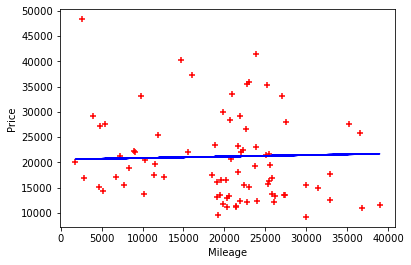

In [18]:
## 2. Chart the original data and the equation on the chart.
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.scatter(x_test,y_test,color="red",marker="+")#,figsize=(10,10))
plt.plot(x_test,Y_test,color="blue")

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [22]:
X1 = df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]] 
y1 = df["Price"]
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.45, random_state = 5)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X1_train, y1_train) 

LinearRegression()

In [24]:
y1_pred = regressor.predict(X1_test)

In [25]:
df2 = pd.DataFrame({'Actual': y1_test, 'Predicted': y1_pred})
df2.head()

,Actual,Predicted
207,9506.047937,14306.294733
330,14429.789643,21155.170163
199,9919.048185,5656.860194
648,23249.841685,15859.219489
620,16927.779761,14244.353009


In [31]:
coe_test=regressor.coef_
inter_test=regressor.intercept_
Y_test=(X1_test*coe_test)+inter_test
Y_test.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
207,2076.666365,20927.126402,5650.068575,1125.348095,6393.210969,6393.210969,10099.929171
330,5202.748895,20927.126402,5371.390178,1125.348095,12912.859228,3875.034007,10099.929171
199,-347.873010,20927.126402,5650.068575,1125.348095,6393.210969,3875.034007,6393.210969
648,1002.446663,20927.126402,5464.282977,1125.348095,12912.859228,6393.210969,6393.210969
620,5814.335643,20927.126402,5557.175776,1125.348095,6393.210969,6393.210969,6393.210969


In [33]:
from sklearn import metrics
error_score=metrics.r2_score(y1_test,y1_pred)
print(error_score)

0.4551489204217809


In [34]:
## 3. Find the combination of the factors that is the best predictor for price.

corr = df.corr()["Price"].sort_values(ascending=False)[1:]
#print(corr)
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.4]
print(relevant_features)

Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Name: Price, dtype: float64


## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [35]:
print(df.Make.value_counts())
print(df.Model.value_counts())
print(df.Type.value_counts())

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64
Cavalier       60
Malibu         60
AVEO           60
Cobalt         50
Ion            50
9_3 HO         40
Lacrosse       30
Grand Prix     30
Bonneville     30
Vibe           30
Monte Carlo    30
Impala         30
Deville        30
9_5            30
9_3            20
9_5 HO         20
Park Avenue    20
Lesabre        20
Grand Am       20
G6             20
Corvette       20
STS-V8         10
L Series       10
CTS            10
CST-V          10
XLR-V8         10
Classic        10
Century        10
Sunfire        10
STS-V6         10
GTO            10
9-2X AWD        4
Name: Model, dtype: int64
Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64


In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer 

In [37]:
le=LabelEncoder()
df['Model']=le.fit_transform(df["Model"])
print(df.Model.value_counts())

24    60
5     60
9     60
20    50
12    50
2     40
18    30
30    30
3     30
22    30
25    30
14    30
6     30
19    30
4     20
23    20
26    20
15    20
17    20
1     20
13    20
27    10
28    10
29    10
16    10
31    10
21    10
11    10
10    10
8     10
7     10
0      4
Name: Model, dtype: int64


In [38]:
df['Make']=le.fit_transform(df["Make"])
print(df.Make.value_counts())

2    320
3    150
4    114
0     80
1     80
5     60
Name: Make, dtype: int64


In [39]:
lb=LabelBinarizer()
df['Type']=lb.fit_transform(df["Type"])
print(df.Type.value_counts())

0    754
1     50
Name: Type, dtype: int64


In [40]:
df.corr()

,Price,Mileage,Make,Model,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,-0.131644,-0.026599,0.508018,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,0.028632,-0.026810,0.027436,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Make,-0.131644,0.028632,1.000000,-0.295619,0.117119,-0.474727,-0.421690,-0.142858,-0.124232,-0.124200,-0.065295
Model,-0.026599,-0.026810,-0.295619,1.000000,-0.149113,0.359248,0.347102,-0.027162,-0.088165,0.022747,-0.082459
Type,0.508018,0.027436,0.117119,-0.149113,1.000000,0.061533,0.065886,-0.462921,0.147689,-0.043637,0.009285
Cylinder,0.569086,-0.029461,-0.474727,0.359248,0.061533,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,-0.421690,0.347102,0.065886,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,-0.142858,-0.027162,-0.462921,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,-0.124232,-0.088165,0.147689,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.124200,0.022747,-0.043637,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444


In [41]:
## 2. Find the combination of the factors that is the best predictor for price.

corr = df.corr()["Price"].sort_values(ascending=False)[1:]
abs_corr = abs(corr)
relevant_features = abs_corr[abs_corr>0.4]
print(relevant_features)

Cylinder    0.569086
Liter       0.558146
Type        0.508018
Cruise      0.430851
Name: Price, dtype: float64
